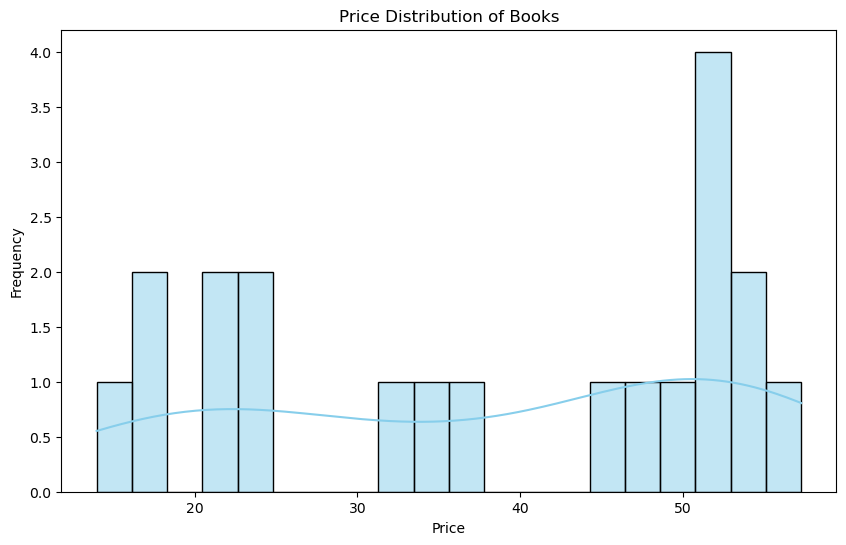

In [1]:
#Data Scraping program by Kanani Njaramba in fulfilment of EBU Python Course. Read the ReadMe file to understand the program 

#import the dependancies
import pandas as pd
import requests as r
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

#Find a website to scrape. Prof this part was quite hard
req1 = r.get('https://books.toscrape.com/')

soup = BeautifulSoup(req1.text, "html.parser")

#create a list to store output of the below code to store the products
product_list = []

products = soup.find_all('article' ,class_='product_pod')

#Loop through all the books in the website
for product in products:
    product_name = product.find('h3').text
    product_price = product.find('p' ,class_='price_color').text
    product_availability = product.find('p' ,class_='instock availability').text
    product_list.append({'name':product_name, 'price':product_price, 'avail':product_availability})
    #print(product_availability)

#Store the output in a pandas dataframe    
    df = pd.DataFrame(product_list)
    #Enable below line to save the dataframe as a CSV
    #df.to_csv('Book_list.csv')
    
# Clean the 'price' column and convert it to numeric
df['price'] = df['price'].str.extract('(\d+\.\d+)').astype(float)

# Visualize price distribution using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution of Books')
plt.show()






